In [12]:
import pandas as pd
import numpy as np
import pathlib
import matplotlib.pyplot as plt

from tslearn.piecewise import PiecewiseAggregateApproximation
#from tslearn.piecewise import SymbolicAggregateApproximation
from pyts.approximation import SymbolicAggregateApproximation
from tslearn.piecewise import OneD_SymbolicAggregateApproximation

from tslearn.preprocessing import TimeSeriesScalerMinMax
import matrixprofile as mp
import stumpy
from scipy.cluster.hierarchy import dendrogram

In [2]:
%%time
#Y_test = pd.read_csv("RavdessTimeSeries_Y_test.csv")
Y_train = pd.read_csv("RavdessTimeSeries_Y_train.csv")

#X_test = np.load("RavdessTimeSeriesTrim_X_test.npy")
X_train = np.load("RavdessTimeSeriesTrim_X_train.npy")

#reshaped_X = np.expand_dims(X_train, axis=2)

CPU times: total: 3.05 s
Wall time: 9.64 s


# Preprocessing

    preprocessing pipeline: noise removing -> PAA -> offset translation

Noise removing (moving average) for a single time series

w=16

ts1s = pd.Series(ts1)

ts1s = ((ts1s - ts1s.mean())/ts1s.std()).rolling(window=w).mean()

ts1_cleaned = ts1s.to_numpy()

plt.plot(ts1_cleaned)

ts1_cleaned.shape

In [3]:
%%time
#20s
#noise removing

w = 16
X_list_cleaned = []

for ts_array in X_train:
    # Convert ts_array to a pandas Series
    ts_series = pd.Series(ts_array)
    
    # Calculate ts_det using rolling mean
    ts_det = ((ts_series - ts_series.mean()) / ts_series.std()).rolling(window=w).mean()
    
    # Convert ts_det back to a NumPy array
    cleaned_array = ts_det.to_numpy()
    
    X_list_cleaned.append(cleaned_array)

X_train_cleaned = np.array(X_list_cleaned)

CPU times: total: 21.2 s
Wall time: 21.1 s


In [4]:
%%time
#18min

#approximation
n_paa_segments = 2500
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
X_train_cleaned = paa.fit_transform(X_train_cleaned)

C:\Users\linov\anaconda3\lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1828 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


CPU times: total: 18min 33s
Wall time: 18min 34s


In [8]:
#store the preprocessed X_train
#np.save("RavdessTimeSeries_X_train_preprocessed.npy", X_train_cleaned)

# Importing Preprocessed Training set 

In [13]:
#Y_test = pd.read_csv("RavdessTimeSeries_Y_test.csv")
Y_train = pd.read_csv("RavdessTimeSeries_Y_train.csv")

#X_test = np.load("RavdessTimeSeriesTrim_X_test.npy")
X_train_cleaned = np.load("RavdessTimeSeries_X_train_preprocessed.npy")

# Mask to select specific subset 

In [14]:
mask_fearfulF = (Y_train['emotion']=='fearful')&(Y_train['sex']=='F')&(Y_train["statement"]=='Kids are talking by the door')
indices_fearfulF = Y_train.index[mask_fearfulF]
#(Y_train["emotional_intensity"]=='normal')
#(Y_train["vocal_channel"]=='speech')

mask_fearfulM = (Y_train['emotion']=='fearful')&(Y_train['sex']=='M')&(Y_train["statement"]=='Kids are talking by the door')&(Y_train["emotional_intensity"]=='normal')&(Y_train["vocal_channel"]=='speech')
indices_fearfulM = Y_train.index[mask_fearfulM]

mask_calmF = (Y_train['emotion']=='calm')&(Y_train['sex']=='F')&(Y_train["statement"]=='Kids are talking by the door')&(Y_train["emotional_intensity"]=='normal')&(Y_train["vocal_channel"]=='speech')
indices_calmF = Y_train.index[mask_calmF]

mask_calmM = (Y_train['emotion']=='calm')&(Y_train['sex']=='M')&(Y_train["statement"]=='Kids are talking by the door')&(Y_train["emotional_intensity"]=='normal')&(Y_train["vocal_channel"]=='speech')
indices_calmM = Y_train.index[mask_calmM]

mask_surprisedF = (Y_train['emotion']=='surprised')&(Y_train['sex']=='F')&(Y_train["statement"]=='Kids are talking by the door')&(Y_train["emotional_intensity"]=='normal')&(Y_train["vocal_channel"]=='speech')
indices_surprisedF = Y_train.index[mask_surprisedF]

mask_surprisedM = (Y_train['emotion']=='surprised')&(Y_train['sex']=='M')&(Y_train["statement"]=='Kids are talking by the door')&(Y_train["emotional_intensity"]=='normal')&(Y_train["vocal_channel"]=='speech')
indices_surprisedM = Y_train.index[mask_surprisedM]
                                   
mask_male = (Y_train['sex']=='M')&(Y_train['statement']=='Kids are talking by the door')&(Y_train["emotional_intensity"]=='normal')&(Y_train["vocal_channel"]=='speech')
indices_male = Y_train.index[mask_male]

mask_female = (Y_train['sex']=='F')&(Y_train['statement']=='Kids are talking by the door')&(Y_train["emotional_intensity"]=='normal')&(Y_train["vocal_channel"]=='speech')
indices_female = Y_train.index[mask_female]

mask_sadM = (Y_train['emotion']=='sad')&(Y_train['sex']=='M')&(Y_train["statement"]=='Kids are talking by the door')&(Y_train["emotional_intensity"]=='normal')&(Y_train["vocal_channel"]=='speech')
indices_sadM = Y_train.index[mask_sadM]

mask_happyM = (Y_train['emotion']=='happy')&(Y_train['sex']=='M')&(Y_train["statement"]=='Kids are talking by the door')&(Y_train["emotional_intensity"]=='normal')&(Y_train["vocal_channel"]=='speech')
indices_happyM = Y_train.index[mask_happyM]
                                                
mask_angryM = (Y_train['emotion']=='angry')&(Y_train['sex']=='M')&(Y_train["statement"]=='Kids are talking by the door')&(Y_train["emotional_intensity"]=='normal')&(Y_train["vocal_channel"]=='speech')
indices_angryM = Y_train.index[mask_angryM]

mask_disgustM = (Y_train['emotion']=='disgust')&(Y_train['sex']=='M')&(Y_train["statement"]=='Kids are talking by the door')&(Y_train["emotional_intensity"]=='normal')&(Y_train["vocal_channel"]=='speech')
indices_disgustM = Y_train.index[mask_disgustM]
       
inf=False
if(inf==True):
    print("fearful F:", indices_fearfulF)
    print("fearful M", indices_fearfulM)
    print("calm F:", indices_calmF)
    print("calm M:", indices_calmM)
    print("surprised F:", indices_surprisedF)
    print("surprised M", indices_surprisedM)

In [118]:
print("mask:", indices_fearfulM)

mask: Int64Index([  36,   37,  244,  245,  452,  453,  660,  661,  868,  869, 1076,
            1077, 1284, 1285, 1492, 1493, 1700, 1701],
           dtype='int64')


## usefull plot to analyze the shapes of audio with the same emotion

In [4]:
def plot_time_series_parallel(num_elements, time_series_list1, time_series_list2):
    fig, axs = plt.subplots(num_elements, 2, figsize=(8, num_elements * 1.5), sharey=False)

    for i in range(num_elements):
        axs[i, 0].plot(time_series_list1[i])
        axs[i, 1].plot(time_series_list2[i])

        axs[i, 0].set_xticks([])
        axs[i, 0].set_yticks([])
        axs[i, 1].set_xticks([])
        axs[i, 1].set_yticks([])

    plt.tight_layout()
    plt.show()

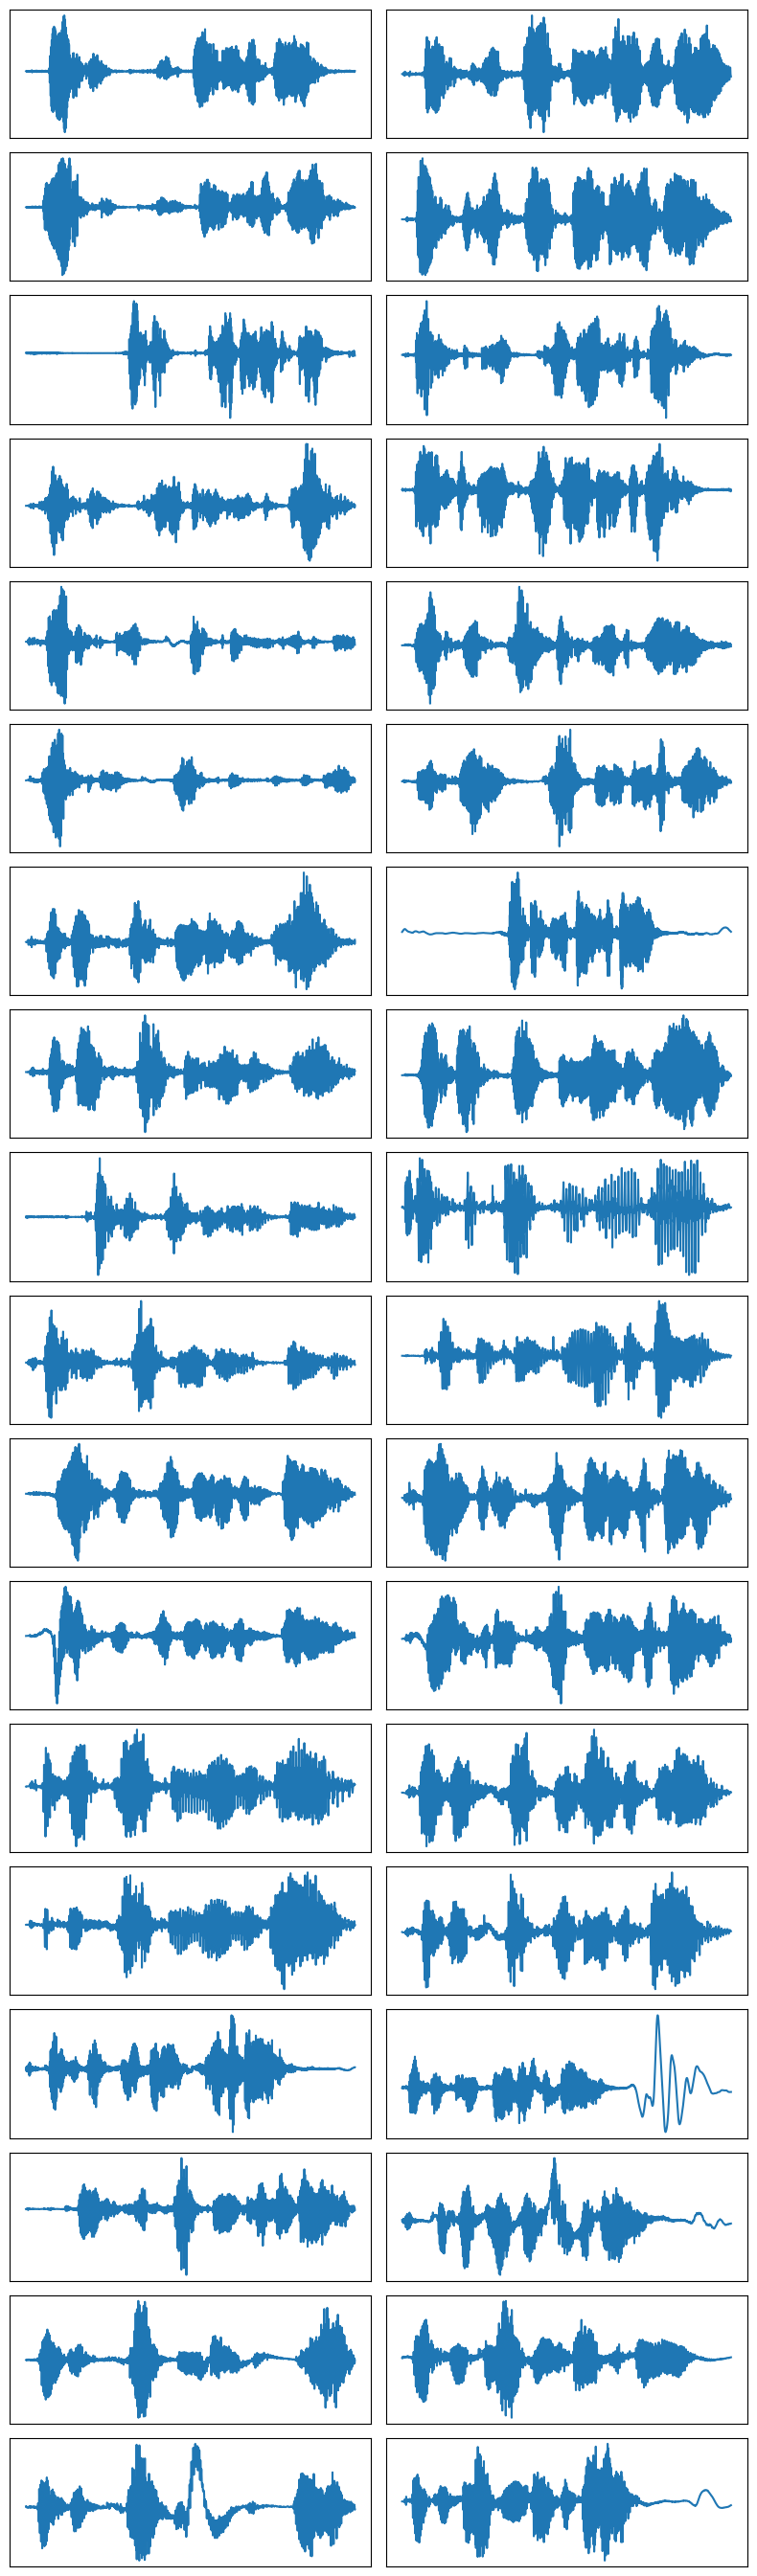

In [5]:
plot_time_series_parallel(18, X_train_cleaned[indices_disgustM], X_train_cleaned[indices_fearfulM])

    https://matrixprofile.docs.matrixprofile.org/api.html#matrixprofile.analyze

## Clustering: Hierarchical

In [7]:
#convert Nan to 0
X_train_cleaned_ = np.nan_to_num(X_train_cleaned, copy=False)

In [78]:
%%time

X1 = X_train_cleaned_[indices_happyM]
X2 = X_train_cleaned_[indices_disgustM]
merged_X = np.concatenate((X1, X2), axis=0)
cluster = mp.discover.hierarchical_clusters(merged_X, window_size = 20, criterion='maxclust', method='weighted', t=2, n_jobs=4)

CPU times: total: 31.2 ms
Wall time: 8.55 s


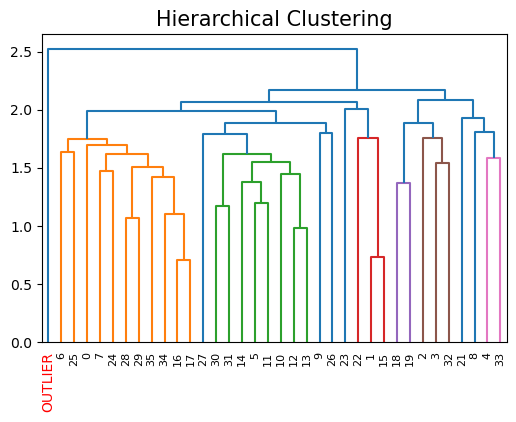

In [80]:
fig, ax = plt.subplots(figsize=(6, 4))
dendrogram(cluster['linkage_matrix'], leaf_rotation=90, ax=ax)
ax.set_title("Hierarchical Clustering", fontsize = 15)

ticks = ax.get_xticks()
labels = ax.get_xticklabels()

# Change the name and color of the leftmost tick and label
labels[0].set_text("OUTLIER")
labels[0].set_size(10)
labels[0].set_color("red")

# Set the modified tick labels
ax.set_xticklabels(labels)

plt.show()

## Clusetring: KMeans

In [15]:
from tslearn.clustering import TimeSeriesKMeans
from tslearn.clustering import silhouette_score

In [16]:
#replace NaN with 0
X_train_cleaned_ = np.nan_to_num(X_train_cleaned)

# subset of X_train
subX = X_train_cleaned_[indices_male]

# correspinding subset of Y for further analysis
subY = Y_train.loc[indices_male]
subY_indices = Y_train.index[indices_male]


subX.shape

(144, 2500)

## KMeans with dtw

In [17]:
%%time
km = TimeSeriesKMeans(n_clusters=8, metric="dtw", 
                      max_iter=1, random_state=0, n_jobs=-1)
y_pred_dtw = km.fit_predict(subX)

CPU times: total: 28min 12s
Wall time: 8min 44s


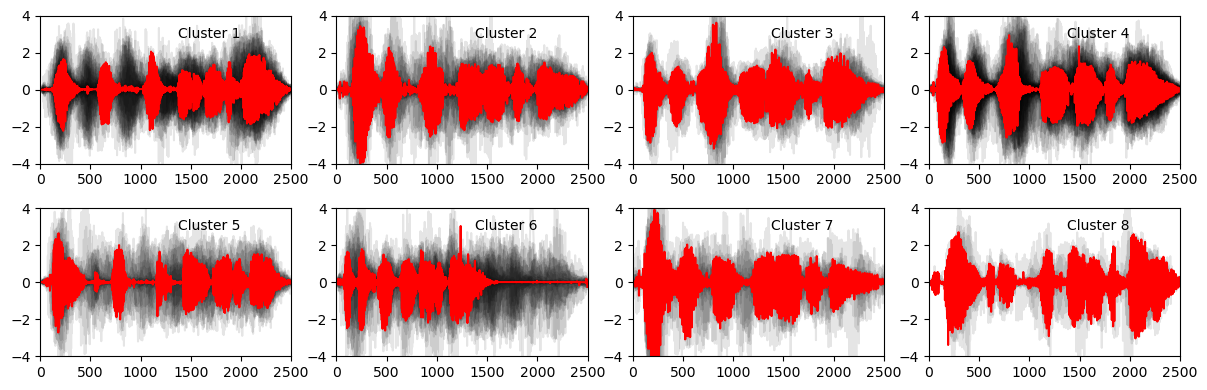

In [18]:
#source: https://tslearn.readthedocs.io/en/stable/auto_examples/clustering/plot_kmeans.html#sphx-glr-download-auto-examples-clustering-plot-kmeans-py
#Plotting the barycenter of the cluster
sz = subX.shape[1]
plt.figure(figsize=(12, 4))

for yi in range(8):
    plt.subplot(2, 4, yi+1)
    for xx in subX[y_pred_dtw == yi]:
        plt.plot(xx.ravel(), "k-", alpha=0.1)
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()

In [131]:
# Calculate the silhouette score
#labels = y_pred.labels_
silhouette_score(subX, y_pred_dtw, metric='dtw', n_jobs=-1)

0.014429448786503977

## Motif discovery on cluster results

In [174]:
# searching for common motif between cluster centroids and vowels with same emotion

In [19]:
#centroids of cluster n and time series belonging to cluster
centroid = km.cluster_centers_[6]
indices = np.where(km.labels_ == 6)[0]

In [20]:
#checking the emotion of a cluster
Ycluster_indices = subY_indices[indices]
Y_train.loc[Ycluster_indices, "emotion"].value_counts()

calm         5
neutral      2
disgust      1
sad          1
fearful      1
surprised    1
Name: emotion, dtype: int64

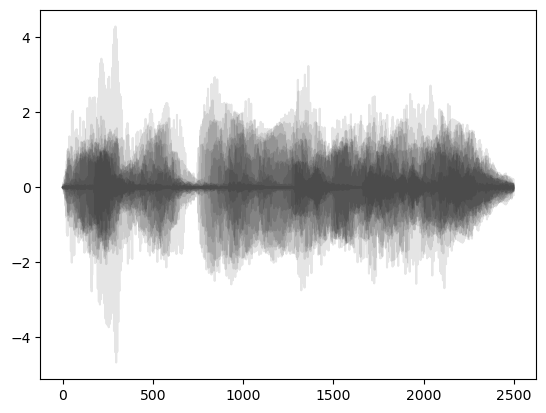

In [31]:
cluster = X_train_cleaned_[indices]
for ts in cluster:
    plt.plot(ts, color="black", alpha=0.1)
#plt.plot(centroid)

[<Figure size 1500x700 with 2 Axes>,
 <Figure size 1500x700 with 4 Axes>,
 <Figure size 1500x700 with 2 Axes>]

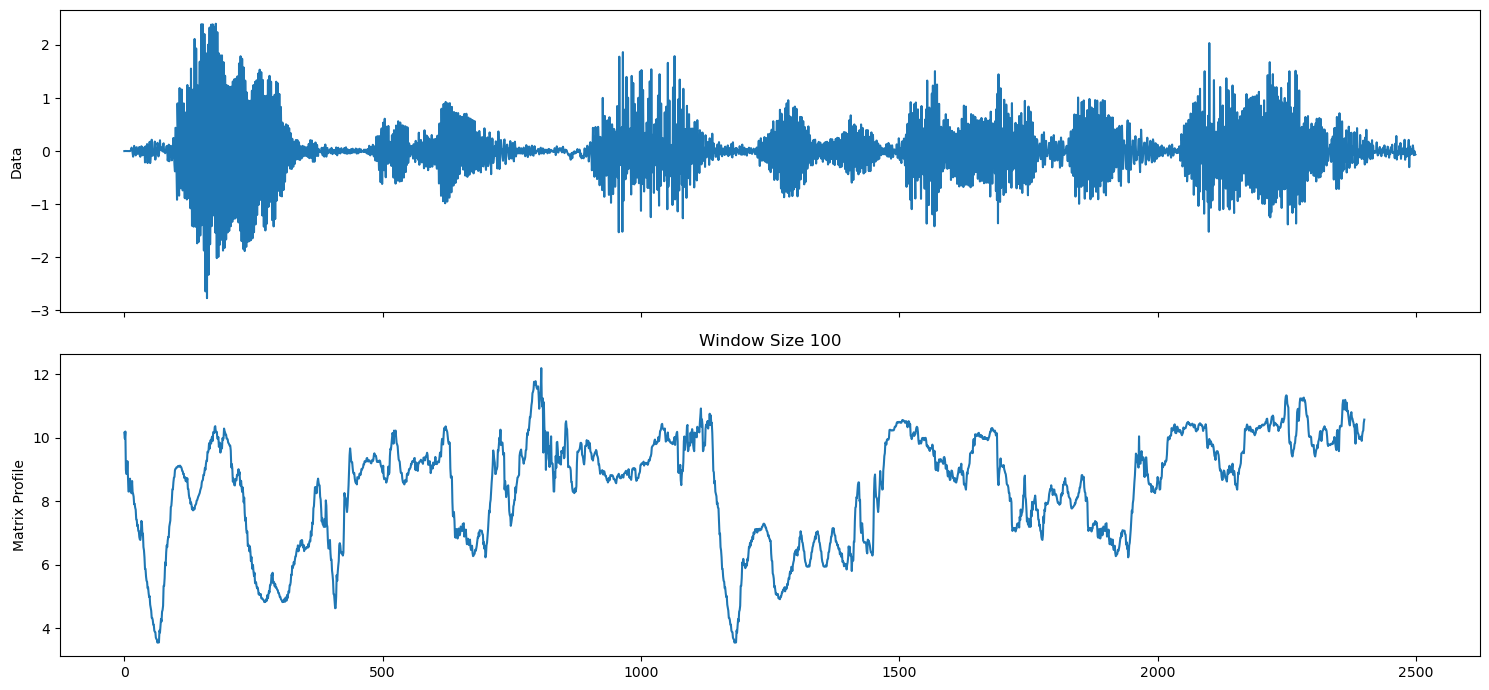

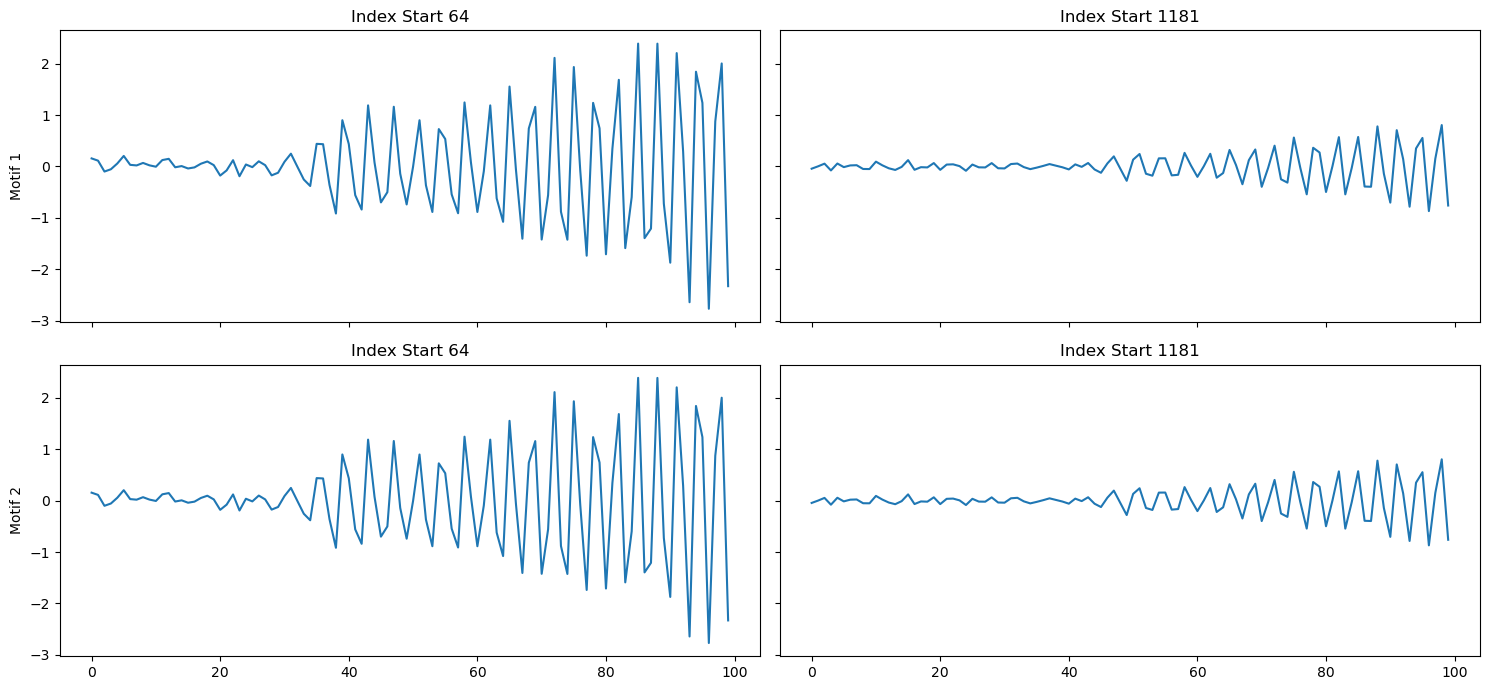

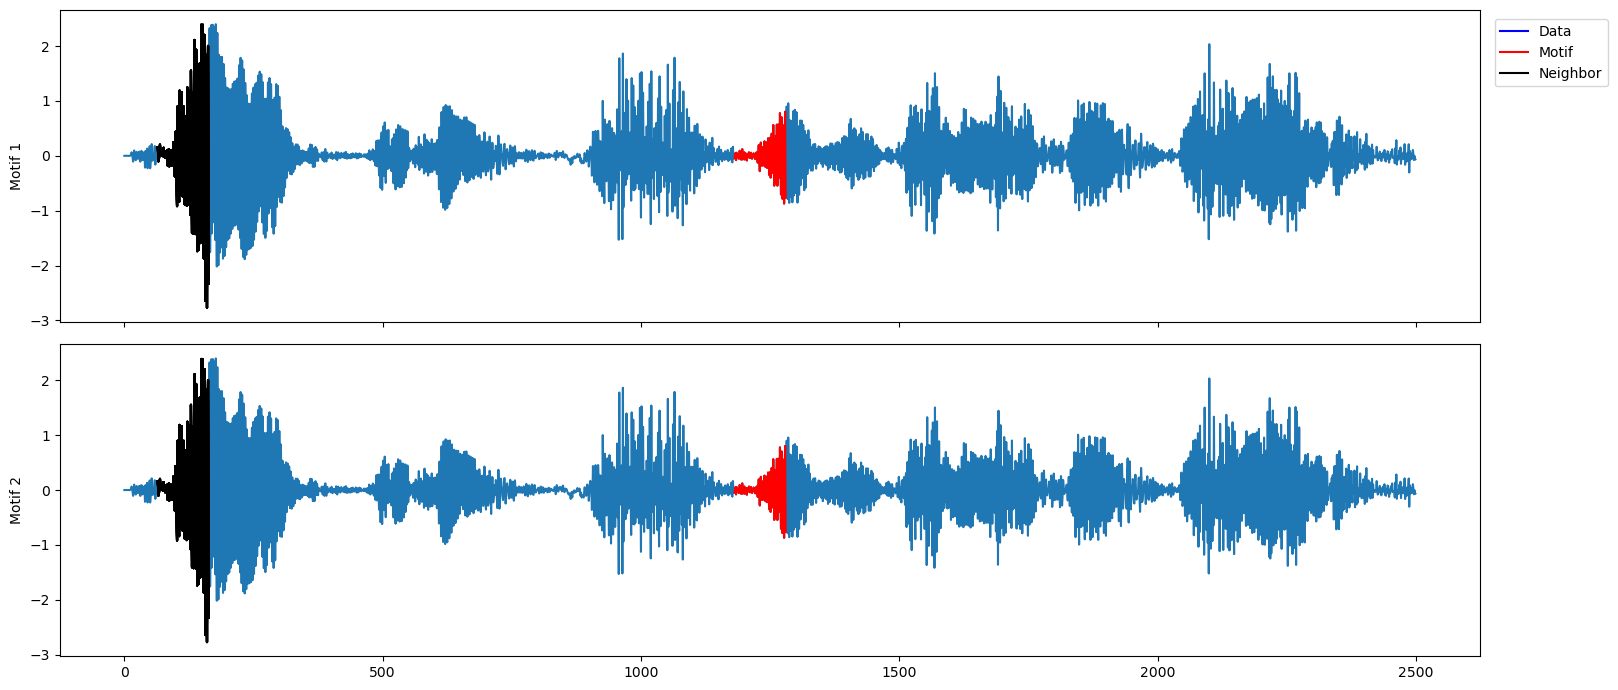

In [32]:
n=0
matrixprofile = mp.compute(cluster[n], windows=100)
profile = mp.discover.motifs(matrixprofile, k=2)
mp.visualize(profile)

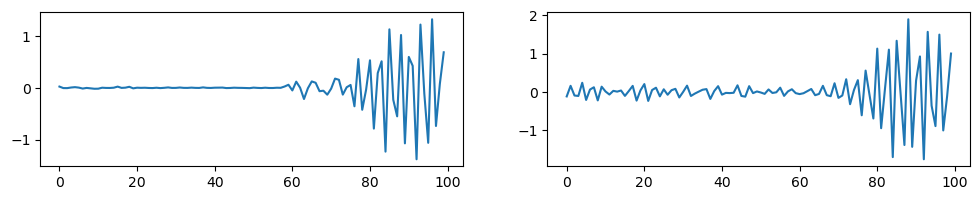

In [77]:
n=2
windows=100
matrixprofile = mp.compute(cluster[n], windows=100)
profile = mp.discover.motifs(matrixprofile, k=2)
index_motifs = profile['motifs'][0]['motifs']

fign=0
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(12, 2))
for i in index_motifs:
    axes[fign].plot(cluster[n][i:i+windows])
    fign=fign+1

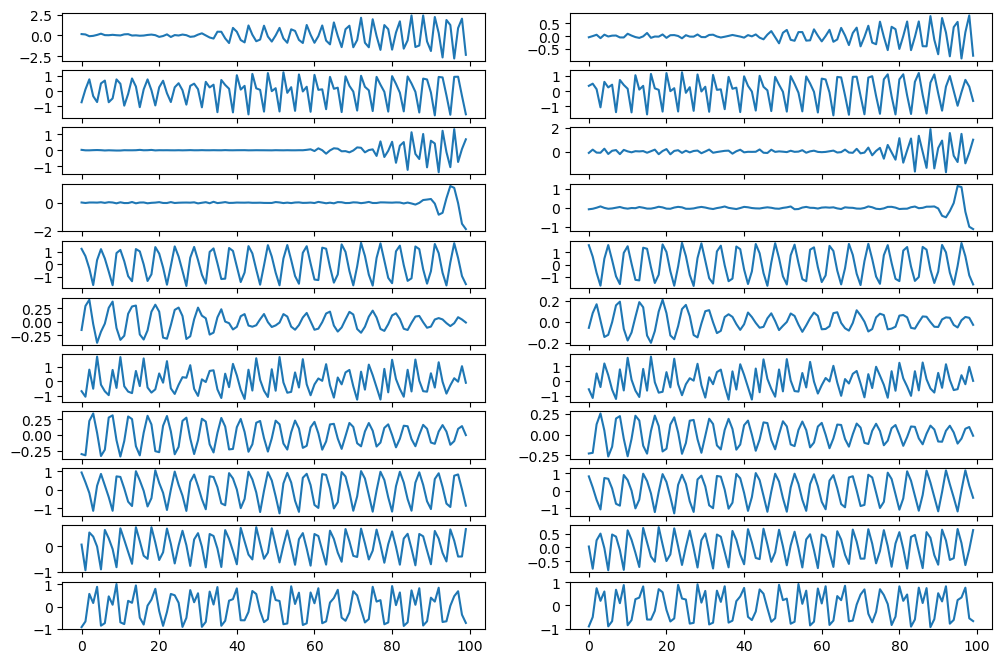

In [100]:
#plotting all motifs profile from cluster 7
w=100
fig, axes= plt.subplots(cluster.shape[0], 2, sharex=True, figsize=(12, 8))

row=0
for ts in cluster:
    matrixprofile = mp.compute(ts, windows=w)
    profile = mp.discover.motifs(matrixprofile, k=2)
    index_motifs = profile['motifs'][0]['motifs']
    
    column=0
    for i in index_motifs:
        axes[row][column].plot(ts[i:i+w])
        column=column+1
    row=row+1

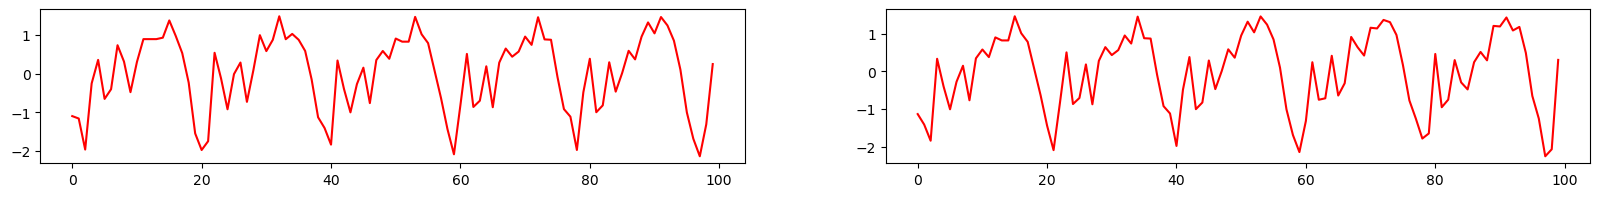

In [118]:
#motif of the centroid
flattened_centroid=np.squeeze(centroid)

w=100
matrixprofile = mp.compute(flattened_centroid, windows=w)
profile = mp.discover.motifs(matrixprofile, k=2)
index_motifs = profile['motifs'][0]['motifs']

fign=0
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(20, 2))
for i in index_motifs:
    axes[fign].plot(flattened_centroid[i:i+windows], color='red')
    fign=fign+1

## KMeans with euclidean

In [169]:
%%time
km = TimeSeriesKMeans(n_clusters=8, metric="euclidean", 
                      max_iter=50, random_state=42, n_jobs=-1)
y_pred = km.fit_predict(subX)
y_pred

CPU times: total: 3.28 s
Wall time: 2.63 s


array([3, 2, 3, ..., 3, 2, 3], dtype=int64)

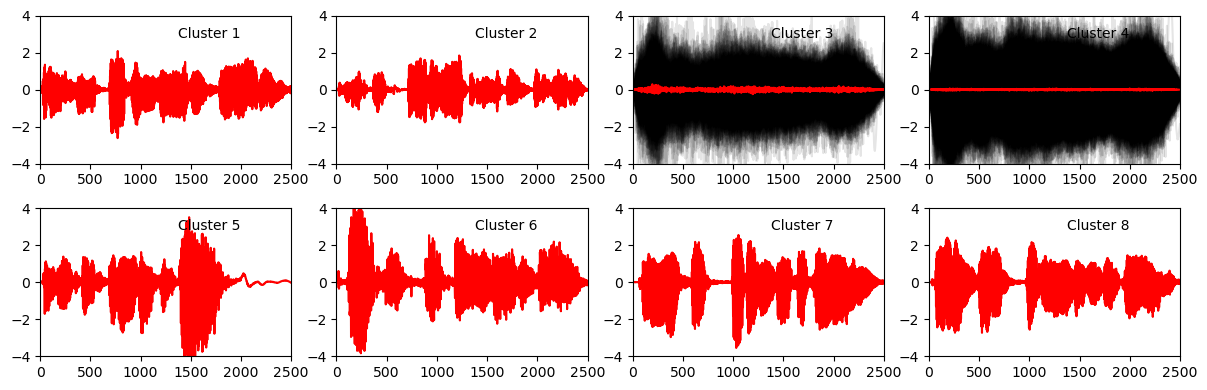

In [170]:
sz = subX.shape[1]
plt.figure(figsize=(12, 4))

for yi in range(8):
    plt.subplot(2, 4, yi+1)
    for xx in subX[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=0.1)
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()

In [167]:
# Calculate the silhouette score
#labels = y_pred.labels_
silhouette_score(subX, y_pred, metric='euclidean', n_jobs=-1)

0.0011051934023307965

# "Shape" plot

In [10]:
%%time

X1 = X_train_cleaned[mask_fearfulM]
X2 = X_train_cleaned[mask_surprisedM]
X3 = X_train_cleaned[mask_calmM]
X4 = X_train_cleaned[mask_disgustM]
X5 = X_train_cleaned[mask_sadM]
X6 = X_train_cleaned[mask_happyM]
X7 = X_train_cleaned[mask_angryM]

CPU times: total: 0 ns
Wall time: 2 ms


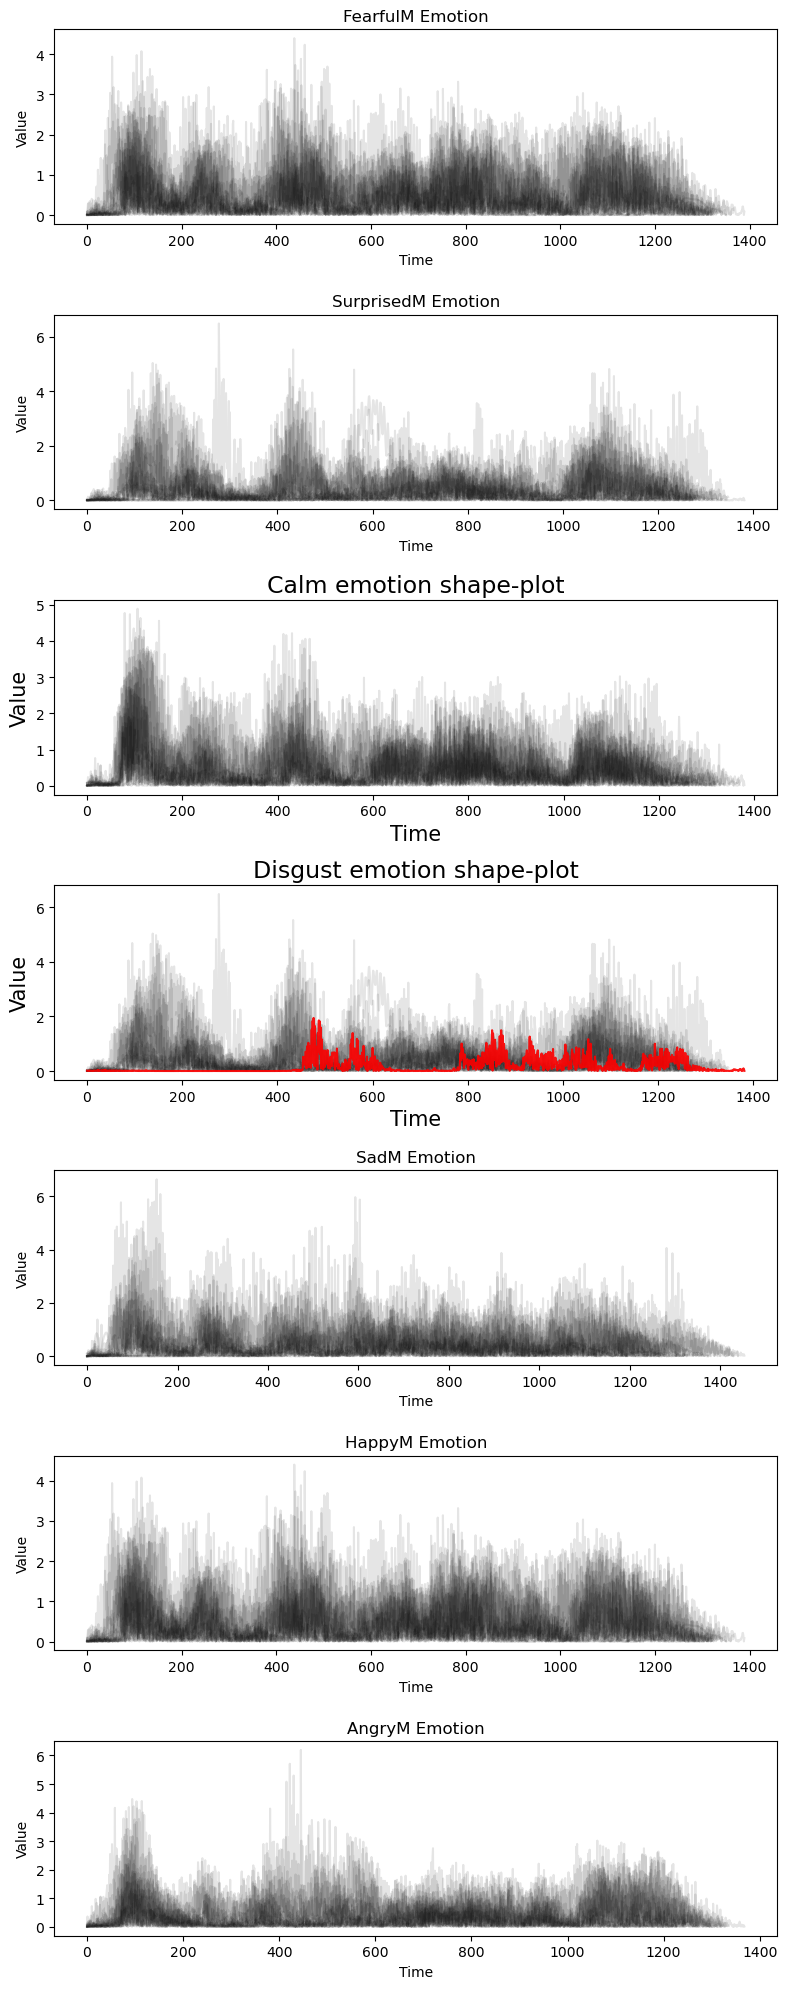

In [87]:
opacity = 0.1
color = 'black'
thr = 0


# Create a figure and multiple axes (subplots)
fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(8, 20))

# Plot fearfulM time series
for i in range(X1.shape[0]):
    series = X1[i, :]
    mask = series > thr
    axes[0].plot(series[mask], color=color, alpha=opacity)

# Set plot title and labels for fearfulM subplot
axes[0].set_title("FearfulM Emotion")
axes[0].set_xlabel("Time")
axes[0].set_ylabel("Value")

# Plot surprisedM time series
for i in range(X2.shape[0]):
    series = X2[i, :]
    mask = series > thr
    axes[1].plot(series[mask], color=color, alpha=opacity)

# Set plot title and labels for surprisedM subplot
axes[1].set_title("SurprisedM Emotion")
axes[1].set_xlabel("Time")
axes[1].set_ylabel("Value")

# Plot calmM time series
for i in range(X3.shape[0]):
    series = X3[i, :]
    mask = series > thr
    axes[2].plot(series[mask], color=color, alpha=opacity)
#series = X_train_cleaned[indices_calmM][2]
#mask = series > thr
#axes[2].plot(series[mask], color="blue", alpha=0.3)

# Set plot title and labels for calmM subplot
axes[2].set_title("Calm emotion shape-plot", fontsize=17)
axes[2].set_xlabel("Time", fontsize=15)
axes[2].set_ylabel("Value", fontsize=15)

# Plot disgustM time series
for i in range(X4.shape[0]):
    series = X4[i, :]
    mask = series > thr
    axes[3].plot(series[mask], color=color, alpha=opacity)
series = merged_X[20]
mask = series > thr
axes[3].plot(series[mask], color="red", alpha=0.9)

# Set plot title and labels for disgustM subplot
axes[3].set_title("Disgust emotion shape-plot", fontsize=17)
axes[3].set_xlabel("Time", fontsize=15)
axes[3].set_ylabel("Value", fontsize=15)

# Plot sadM time series
for i in range(X5.shape[0]):
    series = X5[i, :]
    mask = series > thr
    axes[4].plot(series[mask], color=color, alpha=opacity)

# Set plot title and labels for sadM subplot
axes[4].set_title("SadM Emotion")
axes[4].set_xlabel("Time")
axes[4].set_ylabel("Value")

# Plot happyM time series
for i in range(X6.shape[0]):
    series = X6[i, :]
    mask = series > thr
    axes[5].plot(series[mask], color=color, alpha=opacity)

# Set plot title and labels for happyM subplot
axes[5].set_title("HappyM Emotion")
axes[5].set_xlabel("Time")
axes[5].set_ylabel("Value")

# Plot angryM time series
for i in range(X7.shape[0]):
    series = X7[i, :]
    mask = series > thr
    axes[6].plot(series[mask], color=color, alpha=opacity)

# Set plot title and labels for angryM subplot
axes[6].set_title("AngryM Emotion")
axes[6].set_xlabel("Time")
axes[6].set_ylabel("Value")

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()